In [37]:
import heapq
import math

import matplotlib.pyplot as plt
import bridges
from IPython.core.pylabtools import figsize

data = bridges.get_us_cities_data()
cities = {}

for city in data:
    cities[city.city] = (city.lon, city.lat)
    
print(cities)

{'Bayou La Batre': (-88.24852, 30.40352), 'Yorktown': (-85.49414, 40.17365), 'Villas': (-74.93851, 39.02872), 'Paducah': (-100.30206, 34.0123), 'Delhi Hills': (-84.61272, 39.09284), 'Buda': (-97.84028, 30.08521), 'Brook Highland': (-86.67388, 33.43566), 'Bynum': (-85.96108, 33.61316), 'Carrollton': (-81.08565, 40.57284), 'Chalkville': (-86.64777, 33.65316), 'Childersburg': (-86.35498, 33.27817), 'Clayton': (-103.1841, 36.45169), 'Columbiana': (-80.69396, 40.88839), 'Cowarts': (-85.30465, 31.20018), 'Daleville': (-85.55803, 40.12115), 'Decatur': (-89.41155, 42.63433), 'East Brewton': (-87.06275, 31.09323), 'Eufaula': (-95.5825, 35.28722), 'Falkville': (-86.90862, 34.36843), 'Florence': (-124.09984, 43.98262), 'Fort Payne': (-85.71969, 34.44425), 'Natalia': (-98.86253, 29.18968), 'Gardendale': (-102.38015, 32.0204), 'Ocean View': (-75.08907, 38.54511), 'Goodwater': (-86.0533, 33.06567), 'Aurora': (-111.93409, 38.92219), 'Greensboro': (-79.79198, 36.07264), 'Guntersville': (-86.29446, 34.

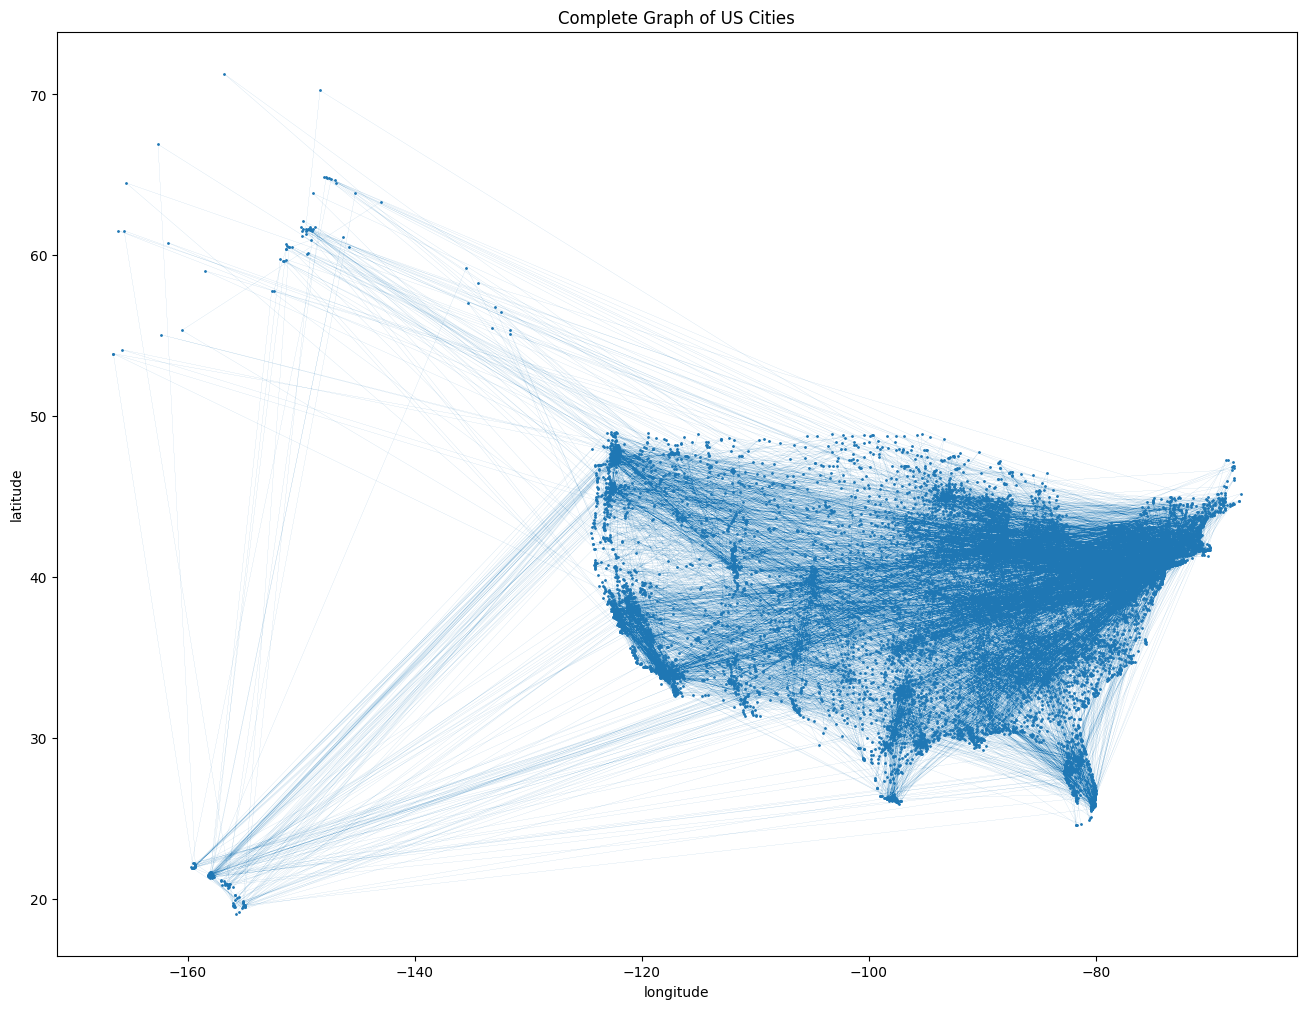

In [38]:
longitudes, latitudes = zip(*cities.values())

plt.figure(figsize(16, 12))
plt.plot(longitudes, 
         latitudes, 
         marker='o',
         markersize=1,
         linewidth=0.05
         )
    
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Complete Graph of US Cities')
plt.show()

In [44]:
def get_distance(point1, point2):
    math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)
    
def mst_prims(cities):
    names = list(cities.keys())
    coords = list(cities.values())
    
    mst = {}
    visited = set()
    heap = []
    visited.add(names[0])
    
    for i in range(1, len(cities)):
        weight = get_distance(coords[0], coords[i])
        heapq.heappush(heap, (0, i, weight))
        
    while len(visited) < len(cities):
        source, destination, distance = heapq.heappop(heap)
        if names[source] not in visited:
            mst[names[source]] = (names[destination], distance)
            visited.add(names[destination])
            
        for i in range(len(names)):
            if names[i] not in visited:
                distance = get_distance(coords[destination], coords[i])
                heapq.heappush(heap, (destination, i, distance))
                
    return mst

result = mst_prims(cities)

longitudes, latitudes = zip(*result.values())

plt.figure(figsize(16, 12))
plt.plot(longitudes, 
         latitudes, 
         marker='o',
         markersize=1,
         linewidth=0.05
         )
    
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Minimum Spanning Tree of US Cities')
plt.show()


        

KeyboardInterrupt: 